In [1]:
import pandas as pd

In [7]:
temp_df = pd.read_csv("daily-minimum-temperatures.csv",parse_dates=True,index_col='Date')
temp_df.shape

(3650, 1)

In [8]:
temp_df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [10]:
temp_df.reset_index(inplace=True)

In [12]:
temp_df.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [13]:
temp_df = pd.read_csv("daily-minimum-temperatures.csv",parse_dates=True,index_col='Date')

<Axes: xlabel='Date'>

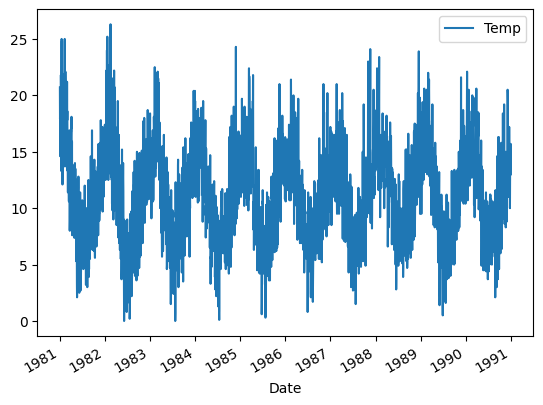

In [14]:
temp_df.plot(kind='line')

In [16]:
temp_df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [17]:
temp_df.reset_index(inplace=True)

In [20]:
grouper = temp_df.groupby(temp_df['Date'].dt.year)

In [21]:
year = pd.DataFrame()
for name,group in grouper:
    year[name]=group['Temp'].values

year

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


In [22]:
import matplotlib.pyplot as plt

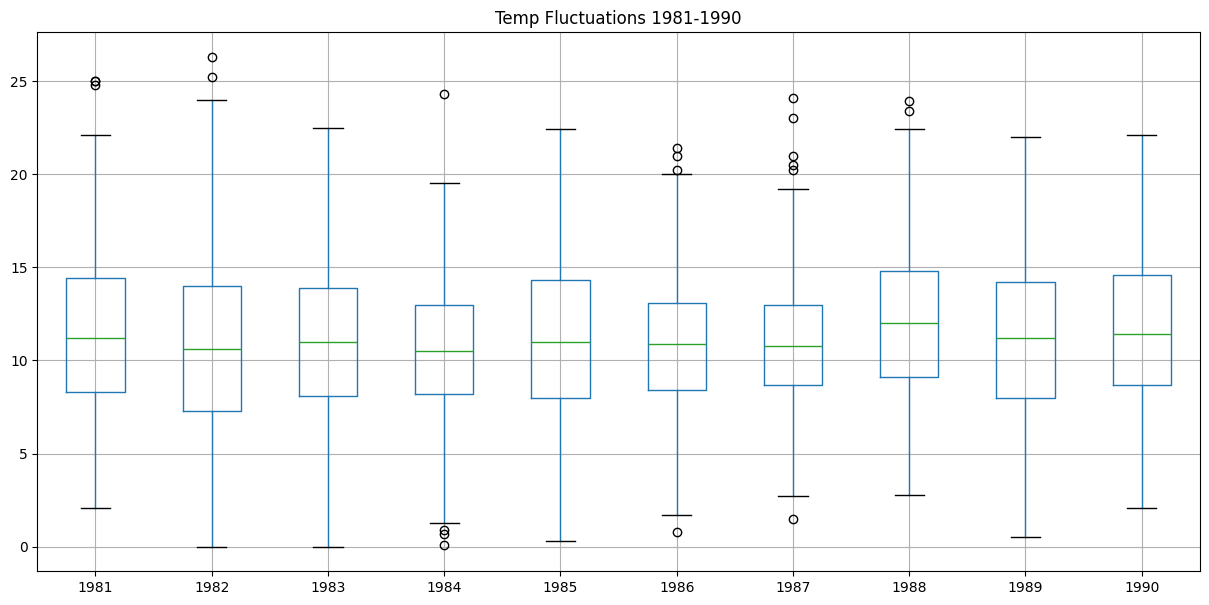

In [23]:
plt.figure(figsize = (15,7))
year.boxplot()
plt.title('Temp Fluctuations 1981-1990')
plt.xlabel = ('Years')
plt.ylabel = ('Temperatures')

In [24]:
from pandas.plotting import lag_plot

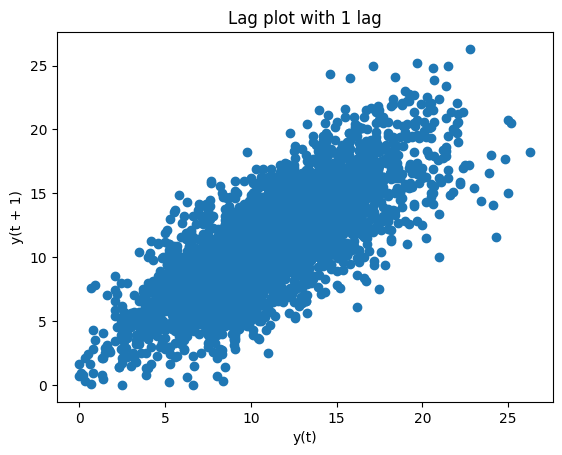

In [25]:
lag_plot(series=temp_df['Temp'],lag=1)
plt.title("Lag plot with 1 lag")
plt.show()

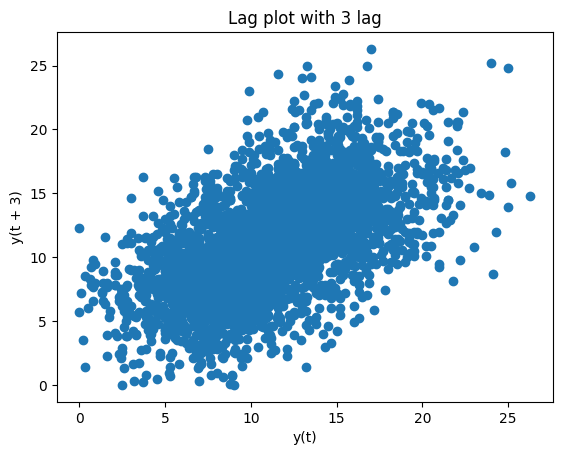

In [26]:
lag_plot(series=temp_df['Temp'],lag=3)
plt.title("Lag plot with 3 lag")
plt.show()

In [27]:
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 1500x700 with 0 Axes>

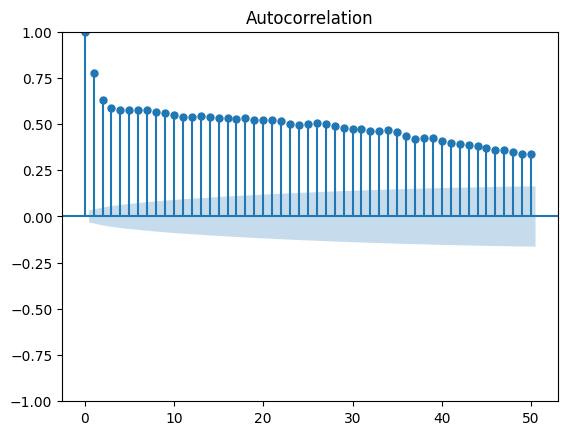

In [28]:
plt.figure(figsize=(15,7))
plot_acf(temp_df['Temp'],lags=50)
plt.show()

<Figure size 1500x700 with 0 Axes>

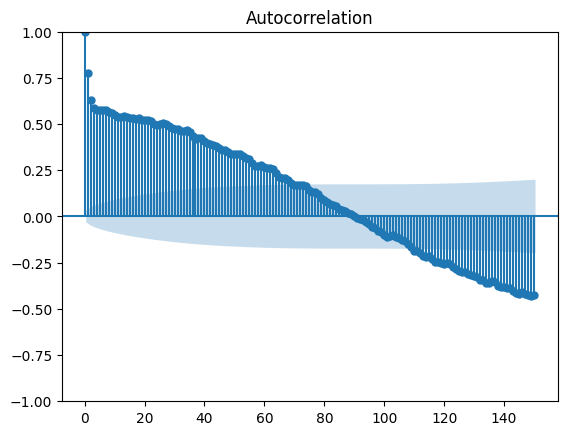

In [30]:
plt.figure(figsize=(15,7))
plot_acf(temp_df['Temp'],lags=150)
plt.show()

#### Resampling Techniques

In [44]:
sales_df = pd.read_csv("sales.csv")

In [45]:
sales_df.head()

,Month,Sales
0,1990-01-01,266.0
1,1990-02-01,145.9
2,1990-03-01,183.1
3,1990-04-01,119.3
4,1990-05-01,180.3


In [46]:
sales_df.shape

(36, 2)

In [47]:
sales_df.dtypes

Month     object
Sales    float64
dtype: object

In [51]:
# data preprocessing
sales_new = pd.read_csv("sales.csv",parse_dates=True,index_col='Month')
sales_new.head()

,Sales
Month,
1990-01-01,266.0
1990-02-01,145.9
1990-03-01,183.1
1990-04-01,119.3
1990-05-01,180.3


In [61]:
resampled_daily = sales_new.resample('D').mean()
resampled_daily.head(32)

,Sales
Month,
1990-01-01,266.0
1990-01-02,NaN
1990-01-03,NaN
1990-01-04,NaN
1990-01-05,NaN
1990-01-06,NaN
1990-01-07,NaN
1990-01-08,NaN
1990-01-09,NaN


In [64]:
interpoled_df = resampled_daily.interpolate('linear')

In [65]:
resampled_daily.interpolate('linear').head(32)

,Sales
Month,
1990-01-01,266.000000
1990-01-02,262.125806
1990-01-03,258.251613
1990-01-04,254.377419
1990-01-05,250.503226
1990-01-06,246.629032
1990-01-07,242.754839
1990-01-08,238.880645
1990-01-09,235.006452


<Axes: xlabel='Month'>

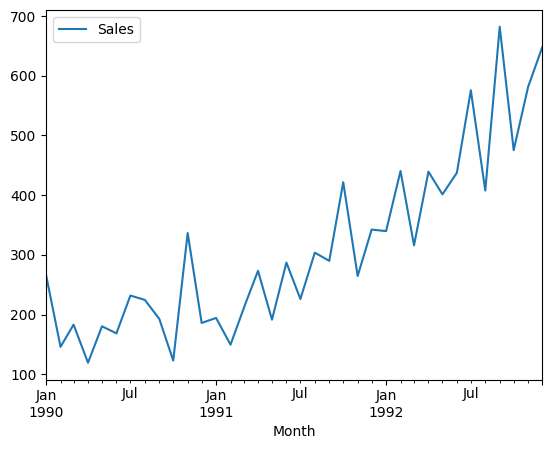

In [66]:
interpoled_df.plot(kind='line')

<Axes: xlabel='Month'>

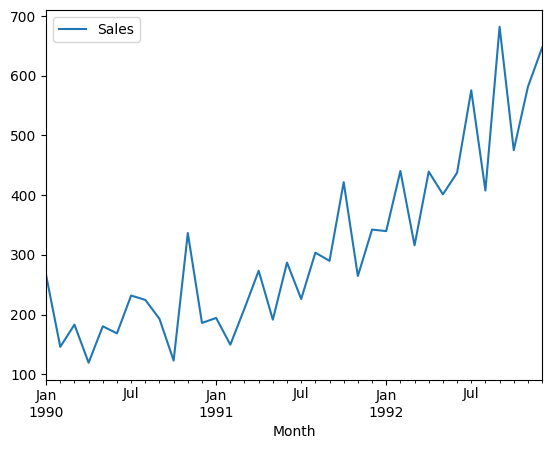

In [67]:
sales_new.plot(kind='line')

In [74]:
sales_new.resample('Q').mean().shape

C:\Users\jayes\AppData\Local\Temp\ipykernel_17880\1561791726.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  sales_new.resample('Q').mean().shape


(12, 1)

In [73]:
sales_new

,Sales
Month,
1990-01-01,266.0
1990-02-01,145.9
1990-03-01,183.1
1990-04-01,119.3
1990-05-01,180.3
1990-06-01,168.5
1990-07-01,231.8
1990-08-01,224.5
1990-09-01,192.8
